In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing data 
df = pd.read_csv('data/breast_cancer_data.csv')

In [4]:
df = df.drop('Unnamed: 32',axis=1)
# Generating a binary 0/1 column in the dataframe for the diagnosis
df['binary_diag'] = np.where(df['diagnosis']== 'M', 1 , 0)
df = df.drop(['diagnosis','id'],axis=1)

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('binary_diag',axis=1)
y = df['binary_diag']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Scaling the features in my training set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import clone_model

In [10]:
# Generating and compiling the model 

model = Sequential()

# Hidden Layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [11]:
# Running model initially for a lot of epochs to force overfitting
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),batch_size=128)


Epoch 299/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0416 - val_loss: 0.1333
Epoch 300/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0429 - val_loss: 0.1255
Epoch 301/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.1266
Epoch 302/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0424 - val_loss: 0.1378
Epoch 303/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.1440
Epoch 304/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0420 - val_loss: 0.1407
Epoch 305/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0419 - val_loss: 0.1410
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0414 - val_loss: 0.1346
Epoch 307/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0414 - val_loss: 0.1327
Epoch 308/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0415 - val_loss: 0.1306
Epoch 309

In [12]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

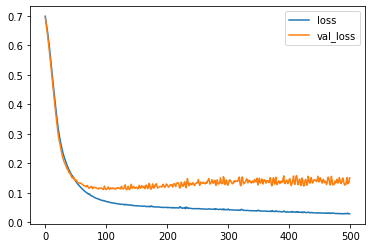

In [13]:
# Validation loss clearly diverges from training loss, therefore suggesting that we've overfit to the training data. i.e. our solution isnt a global one, its only works for the training data
losses.plot()

In [14]:
# To avoid the overfitting we're going to use early stopping when we run the model next.
# Generating and compiling the model 

model = Sequential()

# Hidden Layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
"""
monitor: value to use for the early stopping
mode: in 'min' the early stopping is implemented when the quantity being monitored reaches its minimum
patience: number of epochs with no improvement until the network stops training"""
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [17]:
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),batch_size=128,callbacks=early_stop)

Epoch 1/500
4/4 [==============================] - 0s 32ms/step - loss: 0.6816 - val_loss: 0.6772
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6724 - val_loss: 0.6666
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6626 - val_loss: 0.6567
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6529 - val_loss: 0.6475
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6441 - val_loss: 0.6379
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6348 - val_loss: 0.6276
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6243 - val_loss: 0.6163
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6130 - val_loss: 0.6042
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6005 - val_loss: 0.5909
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5875 - val_loss: 0.5766
Epoch 11/500
4/4 [==========

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

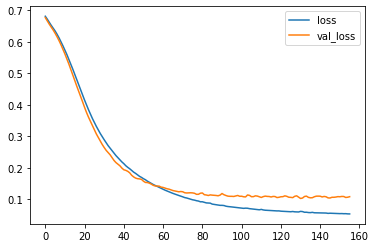

In [19]:
losses.plot()